In [8]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display, clear_output
import statistics

In [9]:
DATA_FILE = f'yt-playlist-analysis/data/%s-data.csv' %datetime.today().strftime('%Y-%m-%d')

# TODO - If no file is found, use the last file in the data directory

In [7]:
data = pd.read_csv(DATA_FILE)

FileNotFoundError: [Errno 2] File yt-playlist-analysis/data/2020-05-14-data.csv does not exist: 'yt-playlist-analysis/data/2020-05-14-data.csv'

In [38]:
data.columns

Index(['id', 'title', 'categoryId', 'playlistId', 'duration', 'views',
       'uploadedDate'],
      dtype='object')

In [39]:
playlists = pd.Series(data['playlistId']).unique()
tuple(playlists)

('PLOtl7M3yp-DX32N0fVIyvn7ipWKNGmwpp',
 'PLOtl7M3yp-DVBdLYatrltDJr56AKZ1qXo',
 'PLE18841CABEA24090',
 'PLE7DDD91010BC51F8',
 'PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb',
 'PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA',
 'PLUl4u3cNGP60ZaGv5SgpIk67YnH1WqCLI',
 'PLF83B8D8C87426E44',
 'PLUl4u3cNGP619EG1wp0kT-7rDE_Az5TNd',
 'PLUl4u3cNGP61-9PEhRognw5vryrSEVLPr',
 'PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab',
 'PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr',
 'PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi',
 'PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6',
 'PL2SOU6wwxB0v1kQTpqpuu5kEJo2i-iUyf',
 'PLVext98k2evjIFqVggHfvecnFu4tTJK_o',
 'PLVext98k2evi8mDNRo4MwIgVgSmwM3cS8',
 'PLSQl0a2vh4HA50QhFIirlEZRXG4yjcoGM',
 'PLWKjhJtqVAbmGw5fN5BQlwuug-8bDmabi',
 'PLWKjhJtqVAbluXJKKbCIb4xd7fcRkpzoz',
 'PL6cactdCCnTLkQah9GKzsJmiLbegy4dEk',
 'PLC3y8-rFHvwgg3vaYJgHGnModB54rxOk3')

In [126]:
selectedviews = data[(data['playlistId']=='PLOtl7M3yp-DX32N0fVIyvn7ipWKNGmwpp')]['views']
selected = data[(data['playlistId']=='PLOtl7M3yp-DX32N0fVIyvn7ipWKNGmwpp')]

In [147]:
def get_outlier(playlist_id, tolerance=2):
    playlist_data = data[data['playlistId']==playlist_id]
    mean = statistics.mean(playlist_data['views'])
    std = statistics.stdev(playlist_data['views'])
    lowerbound = mean - std * tolerance
    upperbound = mean + std * tolerance
    return playlist_data[playlist_data['views'].isin([x for x in playlist_data['views'] if x < lowerbound or x > upperbound])]

In [174]:
frames = []
for i in range(len(tuple(playlists))):
    frames.append(get_outlier(playlists[i]))

list_of_outliers = pd.concat(frames)
list_of_outliers

,id,title,categoryId,playlistId,duration,views,uploadedDate
0,A2bFN3MyNDA,Lecture 1 - Introduction to Algorithms,24,PLOtl7M3yp-DX32N0fVIyvn7ipWKNGmwpp,PT1H20M1S,51157,2017-03-20T23:02:15Z
26,78dUCOF9zxE,Lecture 0 - Course Administration,24,PLOtl7M3yp-DVBdLYatrltDJr56AKZ1qXo,PT44M15S,11935,2017-02-23T20:58:27Z
27,Oqb3WSPOyv8,Lecture 1 - Introduction to Data Science,24,PLOtl7M3yp-DVBdLYatrltDJr56AKZ1qXo,PT1H11M59S,10597,2017-03-03T22:15:00Z
73,2Op3QLzMgSY,Lecture 1A | MIT 6.001 Structure and Interpret...,27,PLE18841CABEA24090,PT1H12M56S,919805,2009-04-08T15:51:22Z
95,QVKj3LADCnA,2. Elimination with Matrices.,27,PLE7DDD91010BC51F8,PT47M42S,1244667,2009-05-07T04:00:50Z
96,FX4C-JpTFgY,3. Multiplication and Inverse Matrices,27,PLE7DDD91010BC51F8,PT46M49S,935915,2009-05-07T04:09:45Z
129,HtSuA80QTyo,"1. Algorithmic Thinking, Peak Finding",27,PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,PT53M22S,2727766,2013-01-14T20:26:48Z
147,OQ5jsbhAv_M,"19. Dynamic Programming I: Fibonacci, Shortest...",27,PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,PT51M47S,1360838,2013-01-14T20:26:48Z
176,nykOeWgQcHM,1. What is Computation?,27,PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA,PT43M6S,217495,2019-07-31T15:15:20Z
180,0jljZRnHwOI,2. Branching and Iteration,27,PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA,PT43M31S,209533,2017-02-15T14:25:50Z


In [41]:
dropdown = widgets.Dropdown(options=playlists)

def update_chart(playlist_id):
    clear_output()
    display(dropdown)
    fig = plt.figure(figsize=(20, 10))
    xticks = plt.xticks(rotation=90)
    ticklabels = plt.ticklabel_format(useOffset=False, style='plain', useLocale=True)
    playlist_data = data[(data['playlistId']==playlist_id['new'])]
    plt.bar(playlist_data['title'], playlist_data['views'])

dropdown.observe(update_chart, 'value')

Dropdown(index=1, options=('PLOtl7M3yp-DX32N0fVIyvn7ipWKNGmwpp', 'PLOtl7M3yp-DVBdLYatrltDJr56AKZ1qXo', 'PLE188…

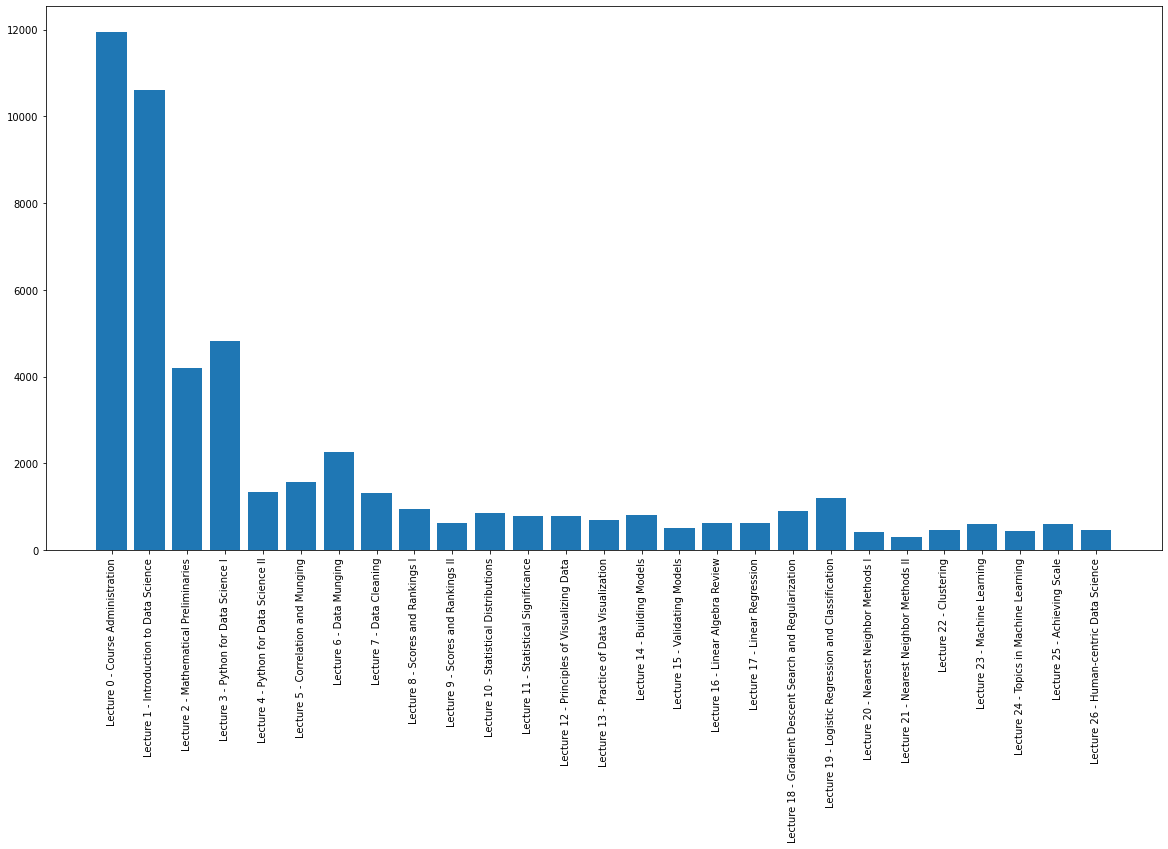

In [42]:
display(dropdown)